# Using Support Vector Machine in CoVID-19 X-Ray Image Dataset
<h4>Simple approach using Scikit Learn & Python</h4>

* References used: https://www.youtube.com/watch?v=0rjlviOQlbc 
* Dataset used:

### 1. Importing necessary libraries: 
we are mainly importing sklearn for Support Vector Machine (SVM) and split dataset to train and test, pickle to save our custom dataset, random to shuffle the dataset

In [ ]:
import random
import pickle
import time
import os
import cv2
from collections import Counter
import numpy as np
import tqdm.notebook as tq
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

import skimage
from skimage.feature import hog
from skimage.color import rgb2gray

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display

### 2. Mounting with CS3244 Gdrive content

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = './drive/My Drive/Kaggle/COVID-19 Radiography Database/'
MODELS = './models/' #path for pickle files directory
DATAFILE_HOG = 'data_hog_128.pickle'
IMG_SIZE = (128, 128)
DATAFILE_128 = 'data_128x128.pickle'

print(os.listdir(PATH))
categories = ['COVID-19', 'NORMAL', 'Viral Pneumonia']

['COVID-19.metadata.xlsx', 'NORMAL.metadata.xlsx', 'Viral Pneumonia.matadata.xlsx', 'README.md.txt', 'COVID-19', 'NORMAL', 'Viral Pneumonia']


### 3. Data Preparation
<h2>[NOTE] You can skip to part 5, as the pickle file for data is already available</h2>

In [ ]:
data = []
for category in categories:
    print(f'category: {category}')
    path = os.path.join(PATH, category)
    label = categories.index(category)

    for img in tq.tqdm(os.listdir(path)):
        imgpath = os.path.join(path, img)
        xray_img = cv2.imread(imgpath, 0)
        xray_img = cv2.resize(xray_img, IMG_SIZE) 
        
        hog_features, hog_image = hog(xray_img,
                              visualize=True,
                              orientations=9,
                              cells_per_block=(2, 2),
                              pixels_per_cell=(8, 8),
                              block_norm='L2-Hys')
        #image = np.array(xray_img).flatten()
        data.append([hog_features, label])

category: COVID-19



category: NORMAL



category: Viral Pneumonia



8100


In [ ]:
print(f'Number of features: {len(data[0][0])}')

Number of features: 8192


### 4. Saving the dataset pickle file 
<i>YOU CAN SKIP TO 5, AS THE DATA FILE IS AVAILABLE</i>

In [ ]:
# original: pickle_in = open('./drive/My Drive/xray_dataset_sklearn.pickle', 'wb')
# trying out:
pickle_in = open('./drive/My Drive/xray_dataset_sklearn_50.pickle', 'wb')
pickle.dump(data, pickle_in)
pickle_in.close()

### 5. Loading the saved dataset pickle file

* this process is just for testing the pickle saving function, in case we need to re-use the dataset for another model, or with different hyperparameters, for the ease-of-usability.

In [ ]:
#original: pickle_in = open('./drive/My Drive/xray_dataset_sklearn.pickle', 'rb')
#trying out:
pickle_in = open('./drive/My Drive/xray_dataset_sklearn_hog_L1sqrt.pickle', 'rb')
data = pickle.load(pickle_in)
pickle_in.close()

### 6. Final dataset preparation

* adding feature (pixel intensity values)
* adding labels ([COVID-19: 0, NORMAL: 1, Viral Pneumonia: 2]) in this format
* test size of 20% (0.2), 80% train


In [ ]:
random.shuffle(data)
TEST_SIZE = 0.2
features = []
labels = []

for feature, label in tq.tqdm(data):
    features.append(feature)
    labels.append(label)
print(features)
print(labels)


[array([ 0, 10, 39, ...,  0,  0,  0], dtype=uint8), array([158, 156, 115, ..., 130,  87,  50], dtype=uint8), array([5, 6, 9, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([ 2,  3, 32, ...,  0,  0,  0], dtype=uint8), array([55, 56, 61, ..., 72, 48, 36], dtype=uint8), array([ 0,  0, 49, ...,  0,  0,  2], dtype=uint8), array([43, 65, 87, ...,  0,  0,  0], dtype=uint8), array([4, 3, 3, ..., 3, 3, 3], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([41, 63, 76, ...,  0,  0,  0], dtype=uint8), array([ 0, 24, 70, ...,  0,  0,  0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([60, 77, 76, ...,  0,  0,  0], dtype=uint8), array([ 9, 41, 64, ...,  0,  0,  0], dtype=uint8), array([23, 65, 89, ...,  0,  0,  0], dtype=uint8), array([17, 38, 57, ...,  0,  0,  0], dtype=uint8), array([12, 17, 74, ...,  0,  0,  0], dtype=uint8), array([23, 51, 72, ...,  0,  0,  0], dtype=uint8), array([ 57,  84, 112, ...,   3,   2,   3], dtype=uint

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=TEST_SIZE)
print(f'Train images: {len(xtrain)}')
print(f'Test images: {len(xtest)}')

Train images: 2324
Test images: 581


### 7. Instantiate SVC model with Support Vector Machine from SKlearn
<h3>Hyperparameters used</h3>

* <b>Regularisation parameter (C)</b> = 1
* gamma set to <b>auto</b>
* <b>Kernel type</b> = poly

In [ ]:
#defining the SVC with Support Vector Machine
kernels = ['poly', 'linear']
models = []
for kernel in kernels:
    models.append(SVC(C=1, gamma='auto', kernel=kernel))
    print(models)

[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]


#### 8. Fitting the model and performing evaluation

In [ ]:
for model in tq.tqdm(models):
    start = time.time()
    model.fit(xtrain, ytrain)
    end = time.time()
    print(f'[{kernels[models.index(model)]}]Time taken for fit: {end - start}s')

[poly]Time taken for fit: 22.609201431274414s
[linear]Time taken for fit: 22.37925100326538s



#### 9. Evaluation of the model using test dataset we have created in part 6

In [ ]:
#Evaluating models for each different kernel used in Support Vector Machine
model_acc = []
for model in tq.tqdm(models):
    start = time.time()
    accuracy = model.score(xtest, ytest)
    end = time.time()
    print(f'[{kernels[models.index(model)]}]Accuracy: {accuracy}, time taken: {end - start}s')
    model_acc.append((model, accuracy))

best_model = max(model_acc, key=lambda x:x[1])
print(f'Model with best accuracy: {best_model}')

[poly]Accuracy: 0.9397590361445783, time taken: 5.121783018112183s
[linear]Accuracy: 0.9345955249569707, time taken: 5.222192049026489s

Model with best accuracy: (SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 0.9397590361445783)


#### Confusion Table/Matrix using Test Data

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Confusion Matrix, without normalization
[[ 38   3   5]
 [  3 257  16]
 [  1   7 251]]
Normalized confusion matrix
[[0.83 0.07 0.11]
 [0.01 0.93 0.06]
 [0.   0.03 0.97]]


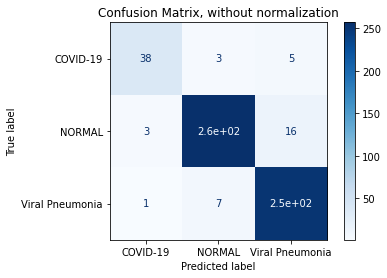

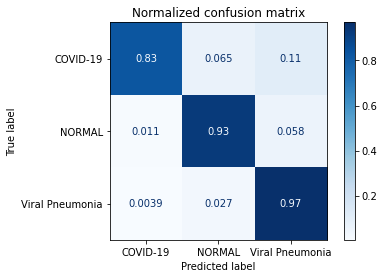

In [ ]:
classifier = best_model
print(classifier[0])
np.set_printoptions(precision=2)

titles_options = [("Confusion Matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier[0], xtest, ytest,
                                 display_labels = categories,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel='linear')
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(features, labels)
selector.support_
selector.ranking_

### Saving the Model

In [ ]:
model = models[0]
#SAVING THE SVC MODEL
pkl_filename = "pickle_model_svc_poly_50.pkl"

with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

os.listdir()

['.config', 'pickle_model_svc_poly_50.pkl', 'drive', 'sample_data']

In [ ]:
# Get support vectors themselves
support_vectors = model.support_vectors_
print(support_vectors)

[[  7.   8.   7. ...   3.   5.   7.]
 [  0.   0.   0. ...  22.  75. 189.]
 [184. 146. 124. ...  93.  86.  65.]
 ...
 [ 19.  38.  56. ...   0.   0.   0.]
 [162. 159. 167. ... 156. 142. 109.]
 [ 24.  22.  21. ...   6.   6.   6.]]


### Image Reduction: using 50x50


In [ ]:
#SVM
import cv2

PATH = './drive/My Drive/Kaggle/COVID-19 Radiography Database/'
print(os.listdir(PATH))
categories = ['COVID-19', 'NORMAL', 'Viral Pneumonia']

data = []
for category in tq.tqdm(categories):
    path = os.path.join(PATH, category)
    label = categories.index(category)

    for img in tq.tqdm(os.listdir(path)):
        imgpath = os.path.join(path, img)
        xray_img = cv2.imread(imgpath, 0)
        xray_img = cv2.resize(xray_img, (50, 50))

        image = np.array(xray_img).flatten()
        data.append([image, label])
        #print(f'{image} {label}')

['COVID-19.metadata.xlsx', 'NORMAL.metadata.xlsx', 'Viral Pneumonia.matadata.xlsx', 'README.md.txt', 'COVID-19', 'NORMAL', 'Viral Pneumonia']


In [ ]:
pickle_in = open('./drive/My Drive/xray_dataset_sklearn_50.pickle', 'wb')
pickle.dump(data, pickle_in)
pickle_in.close()

Load the saved data

In [ ]:
pickle_in = open('./drive/My Drive/xray_dataset_sklearn_50.pickle', 'rb')
data = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
random.shuffle(data)
TEST_SIZE = 0.2
features = []
labels = []

for feature, label in tq.tqdm(data):
    features.append(feature)
    labels.append(label)
print(features)
print(labels)

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=TEST_SIZE)
print(f'Train images: {len(xtrain)}')
print(f'Test images: {len(xtest)}')


[array([49, 72, 95, ...,  0,  0,  0], dtype=uint8), array([124, 130, 110, ..., 120,  37,   2], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([ 93,  99, 104, ...,  38,   0,   0], dtype=uint8), array([ 0,  9, 26, ..., 23,  0,  0], dtype=uint8), array([72, 70, 70, ..., 34, 33, 31], dtype=uint8), array([231, 107, 112, ..., 254, 254, 254], dtype=uint8), array([172, 174, 177, ..., 158, 129,  72], dtype=uint8), array([255,  67,  84, ...,   0,   0,   0], dtype=uint8), array([2, 0, 2, ..., 0, 0, 0], dtype=uint8), array([ 8,  7,  7, ..., 55, 25,  2], dtype=uint8), array([44, 52, 54, ..., 27, 29, 29], dtype=uint8), array([143, 163,  96, ...,  40,   0,   0], dtype=uint8), array([ 0, 17, 57, ...,  0,  0,  0], dtype=uint8), array([56, 71, 64, ..., 19, 24, 25], dtype=uint8), array([ 67,  91,  94, ..., 124, 116, 109], dtype=uint8), array([ 53, 106, 124, ...,   0,   0,   0], dtype=uint8), array([23, 49, 61, ...,  0,  0,  0], dtype=uint8), array([156, 105, 116, ...,   0,   0,   0], d

In [ ]:
#defining the SVC with Support Vector Machine
kernels = ['poly', 'linear', 'rbf', 'sigmoid']
models = []
for kernel in kernels:
    models.append(SVC(C=1, gamma='auto', kernel=kernel))
    print(models)

[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),

Fit the Models

In [ ]:
for model in tq.tqdm(models):
    start = time.time()
    model.fit(xtrain, ytrain)
    end = time.time()
    print(f'[{kernels[models.index(model)]}]Time taken for fit: {end - start}s')

[poly]Time taken for fit: 6.466059923171997s
[linear]Time taken for fit: 6.723914384841919s
[rbf]Time taken for fit: 31.731685161590576s
[sigmoid]Time taken for fit: 22.684382438659668s



In [ ]:
#Evaluating models for each different kernel used in Support Vector Machine
model_acc = []
for model in tq.tqdm(models):
    start = time.time()
    accuracy = model.score(xtest, ytest)
    end = time.time()
    print(f'[{kernels[models.index(model)]}]Accuracy: {accuracy}, time taken: {end - start}s')
    model_acc.append((model, accuracy))

best_model = max(model_acc, key=lambda x:x[1])
print(f'Model with best accuracy: {best_model}')

[poly]Accuracy: 0.9380378657487092, time taken: 1.41023588180542s
[linear]Accuracy: 0.9259896729776248, time taken: 1.4885802268981934s
[rbf]Accuracy: 0.4784853700516351, time taken: 5.55555534362793s
[sigmoid]Accuracy: 0.46815834767641995, time taken: 5.449656248092651s

Model with best accuracy: (SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 0.9380378657487092)


Save the Model

In [ ]:
model = models[0]
#SAVING THE SVC MODEL
pkl_filename = "pickle_model_svc_poly_50.pkl"

with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

os.listdir()

['.config', 'pickle_model_svc_poly_50.pkl', 'drive', 'sample_data']

### Trying out another augmentation

**Things to work on:**
- Visualisation
- explore feature selection / downsizing

**Things to visualize:**

1. svm plot
2. distribution of data
3. distribution of training & validation data
4. process of data augmentation

**Analyse:**
- process of making improvements 
- why we chose to do things in this way

In [ ]:
import skimage
from skimage.feature import hog
from skimage.color import rgb2gray

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
import cv2

PATH = './drive/My Drive/Kaggle/COVID-19 Radiography Database/'
print(os.listdir(PATH))
categories = ['COVID-19', 'NORMAL', 'Viral Pneumonia']

['COVID-19.metadata.xlsx', 'NORMAL.metadata.xlsx', 'Viral Pneumonia.matadata.xlsx', 'README.md.txt', 'COVID-19', 'NORMAL', 'Viral Pneumonia']


In [ ]:
#SVM
count = 0
data = []
for category in tq.tqdm(categories):
    path = os.path.join(PATH, category)
    label = categories.index(category)

    for img in tq.tqdm(os.listdir(path)):
        '''
        count = count + 1
        if (count > 1):
          break
        '''
        imgpath = os.path.join(path, img)
        xray_img = cv2.imread(imgpath, 0)
        #print("before: ", xray_img.shape)
        #plt.imshow(xray_img)
        xray_img = cv2.resize(xray_img, (128, 128))
        #plt.imshow(xray_img)
        #print("resized image shape: ", xray_img.shape)
        
        hog_features, hog_image = hog(xray_img,
                              visualize=True,
                              orientations=9,
                              cells_per_block=(2, 2),
                              pixels_per_cell=(8, 8),
                              block_norm='L2-Hys')
        #plt.imshow(hog_image, cmap=mpl.cm.gray)
        #plt.imshow(hog_image)
        #print("feature size: ", hog_features.shape)
        #print("hog feature", hog_features)
        #print("hog feature size: ", hog_features.size)
        #print("hog image: ", hog_image)
        #image = np.array(xray_img).flatten()
        #data.append([image, label])
        data.append([hog_features, label])

        #print(f'{image} {label}')



['COVID-19.metadata.xlsx', 'NORMAL.metadata.xlsx', 'Viral Pneumonia.matadata.xlsx', 'README.md.txt', 'COVID-19', 'NORMAL', 'Viral Pneumonia']


In [ ]:
# original: pickle_in = open('./drive/My Drive/xray_dataset_sklearn.pickle', 'wb')
# trying out:
pickle_in = open('./drive/My Drive/xray_dataset_sklearn_hog_unreduced.pickle', 'wb')
pickle.dump(data, pickle_in)
pickle_in.close()

In [ ]:
pickle_in = open('./drive/My Drive/xray_dataset_sklearn_hog_L1sqrt.pickle', 'rb')
data = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
random.shuffle(data)
TEST_SIZE = 0.2
features = []
labels = []

for feature, label in tq.tqdm(data):
    features.append(feature)
    labels.append(label)
#print(features)
#print(labels)

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=TEST_SIZE)
print(f'Train images: {len(xtrain)}')
print(f'Test images: {len(xtest)}')


Train images: 2324
Test images: 581


In [ ]:
print(len(xtest[0]))

8192


In [ ]:
#defining the SVC with Support Vector Machine
kernels = ['poly', 'linear', 'rbf', 'sigmoid']
models = []
for kernel in kernels:
    models.append(SVC(C=1, gamma='auto', kernel=kernel))
    print(models)

[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
[SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),

Fit the Model

In [ ]:
for model in tq.tqdm(models):
    start = time.time()
    model.fit(xtrain, ytrain)
    end = time.time()
    print(f'[{kernels[models.index(model)]}]Time taken for fit: {end - start}s')

[poly]Time taken for fit: 25.495052337646484s
[linear]Time taken for fit: 25.956228256225586s
[rbf]Time taken for fit: 120.53660464286804s
[sigmoid]Time taken for fit: 84.90064358711243s



In [ ]:
#Evaluating models for each different kernel used in Support Vector Machine
model_acc = []
for model in tq.tqdm(models):
    start = time.time()
    accuracy = model.score(xtest, ytest)
    end = time.time()
    print(f'[{kernels[models.index(model)]}]Accuracy: {accuracy}, time taken: {end - start}s')
    model_acc.append((model, accuracy))

best_model = max(model_acc, key=lambda x:x[1])
print(f'Model with best accuracy: {best_model}')

[poly]Accuracy: 0.9483648881239243, time taken: 5.737393140792847s
[linear]Accuracy: 0.9345955249569707, time taken: 6.04390025138855s
[rbf]Accuracy: 0.47160068846815834, time taken: 21.125876426696777s
[sigmoid]Accuracy: 0.459552495697074, time taken: 18.2271785736084s

Model with best accuracy: (SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 0.9483648881239243)


In [ ]:
model = models[1]
#SAVING THE SVC MODEL
pkl_filename = "pickle_model_svc_poly_hog_features_L2_Hys.pkl"

with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

os.listdir()

['.config',
 'pickle_model_svc_poly_hog_L1.pkl',
 'pickle_model_svc_poly_50.pkl',
 'pickle_model_svc_poly_hog_features_L2_Hys.pkl',
 'pickle_model_svc_poly_hog_L2.pkl',
 'drive',
 'pickle_model_svc_poly_hog_L2_Hys.pkl',
 'sample_data']

## Current Results:
---

Poly, 100x100: 0.94664371

Poly, 50x50: 0.9449225

---

**Hyperparameters:** cells_per_block=(2, 2), pixels_per_cell=(8, 8),

Poly, Hog, L1: 0.9242685

Poly, Hog, L1-sqrt:  0.91566265

Poly, Hog, L2: 0.932874354

Poly, Hog, L2-Hys: 0.941480206

---
**Hyperparameters:** cells_per_block=(1, 1), pixels_per_cell=(16, 16),

Poly, Hog, L2-Hys: 0.94836488

Poly, Hog, L2: 0.93287435

---
**Hyperparameters:** cells_per_block=(4, 4), pixels_per_cell=(8, 8)

Poly, Hog, L2-Hys: 0.931153184

---
**Hyperparameters:** cv2.resize(xray_img, (128, 128)) cells_per_block=(1, 1), pixels_per_cell=(16, 16)

Poly, Hog, L2-Hys: 0.94664371

---
**Hyperparameters:** cv2.resize(xray_img, (128, 128)) cells_per_block=(2, 2), pixels_per_cell=(8, 8)

Linear, Hog, L2-Hys: 0.96041308


